In [145]:
import pandas as pd 
import numpy as np 
file_path = 'data/Doviz_Satislari_20050101_20231205_Training_Set.xlsx' 
data = pd.read_excel(file_path) 
data_cleaned = pd.read_excel(file_path, skiprows=12) 
data_cleaned = data_cleaned.drop(0) 
non_numeric = data_cleaned.select_dtypes(exclude=[np.number]).columns 
nan_values = data_cleaned.isna().sum() 
data_cleaned = data_cleaned.dropna() 
for col in data_cleaned.columns[2:]: 
    data_cleaned[col] = pd.to_numeric(data_cleaned[col],errors='coerce') 
non_numeric_clean, nan_values_clean =data_cleaned.select_dtypes(exclude=[np.number]).columns, data_cleaned.isna().sum()

In [146]:
print(data_cleaned.columns.tolist())

['No', 'Tarih', 'TP DK USD S YTL', 'TP DK EUR S YTL', 'TP DK GBP S YTL', 'TP DK SEK S YTL', 'TP DK CHF S YTL', 'TP DK CAD S YTL', 'TP DK KWD S YTL', 'TP DK SAR S YTL']


In [147]:
features  = ['TP DK USD S YTL', 'TP DK EUR S YTL', 'TP DK GBP S YTL', 'TP DK SEK S YTL', 'TP DK CHF S YTL', 'TP DK CAD S YTL', 'TP DK KWD S YTL']
target  = ['TP DK SAR S YTL']

X = data_cleaned[features]
y = data_cleaned[target]

In [148]:
class MultipleLinearRegression: 
    def __init__(self): 
        self.coefficients = None 
 
    def fit(self, X, y): 
        X = np.insert(X, 0, 1, axis=1) 
        X_transpose = np.transpose(X) 
        beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
        self.coefficients = beta 
 
    def predict(self, X): 
        X = np.insert(X, 0, 1, axis=1) 
        return X.dot(self.coefficients) 
model = MultipleLinearRegression() 
model.fit(X.values, y.values) 
 
results = pd.DataFrame({
    'Actual': y.values.ravel(), 
    'Predicted': model.predict(X.values).ravel()
})

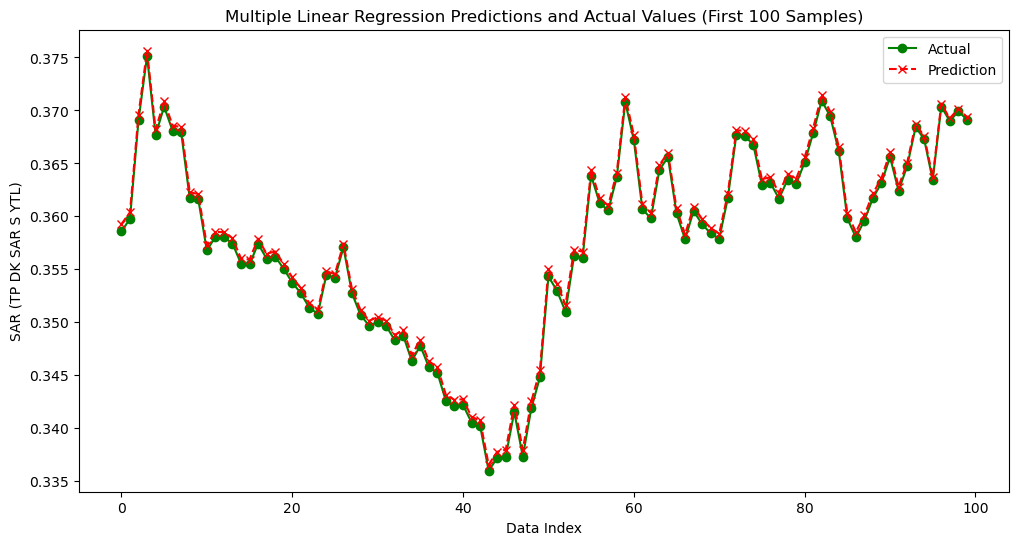

In [149]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(12, 6)) 

plt.plot(results['Actual'][:100], 
         label='Actual', color='green', 
         marker='o') 

plt.plot(results['Predicted'][:100], 
         label='Prediction', color='red', 
         linestyle='--', marker='x') 

plt.title('Multiple Linear Regression Predictions and Actual Values (First 100 Samples)') 
plt.xlabel('Data Index') 
plt.ylabel('SAR (TP DK SAR S YTL)') 

plt.legend() 
plt.show()


In [150]:
def mean_squared_error(y_true, y_pred): 
    return np.mean((y_true - y_pred) ** 2) 
 
mse_all = mean_squared_error(results['Actual'], results['Predicted']) 
 
def derivative_mse(y_true, y_pred, X): 
    return -2 * np.dot(X.T, (y_true - y_pred)) / len(y_true) 
 
mse_derived = derivative_mse(results['Actual'], results['Predicted'], X.values) 
 
def gradient_descent(X, y, learning_rate, epochs): 
    weights = np.random.rand(X.shape[1]) 
    mse_history = [] 
    for epoch in range(epochs): 
        predictions = np.dot(X, weights) 
        mse = mean_squared_error(y, predictions) 
        mse_history.append(mse) 
        gradient = derivative_mse(y, predictions, X) 
        weights -= learning_rate * gradient 
    return weights, mse_history


In [151]:
class MultipleLinearRegressionRegularized: 
    def __init__(self, l1_ratio=0.5, alpha=0.1, epochs=1000, learning_rate=0.01): 
        self.l1_ratio = l1_ratio 
        self.alpha = alpha 
        self.epochs = epochs 
        self.learning_rate = learning_rate 
        self.coefficients = None 
 
    def fit(self, X, y): 
        X_extended = np.column_stack((np.ones(len(X)), X)) 
        m, n = X_extended.shape 
        self.coefficients = np.zeros(n) 
 
        for _ in range(self.epochs): 
            y_pred = X_extended.dot(self.coefficients) 
            gradients = -2/m * X_extended.T.dot(y - y_pred) 
            l1_penalty = self.l1_ratio * self.alpha * np.sign(self.coefficients) 
            l2_penalty = (1 - self.l1_ratio) * self.alpha * self.coefficients 
            
            # Only apply regularization to the coefficients, not the bias term
            gradients[1:] += l1_penalty[1:] + l2_penalty[1:]
            
            self.coefficients -= self.learning_rate * gradients 

    def predict(self, X): 
        X_extended = np.column_stack((np.ones(len(X)), X)) 
        return X_extended.dot(self.coefficients)
    


In [152]:
# Model initialization and usage

X_scaled = np.array(X)  # if X is already a numpy array, this is not needed

# Refit the model with scaled data
mlr_regularized = MultipleLinearRegressionRegularized(l1_ratio=0.5, alpha=0.1, epochs=1000, learning_rate=0.001)
mlr_regularized.fit(X_scaled, y.values.ravel())

In [153]:
user_values = [] 
print("Please enter values for the following independent variables:")

independent_variables = ["USD", "EUR", "GBP", "SEK", "CHF", "CAD", "KWD"]

for variable in independent_variables: 
    user_input_value = float(input(f"{variable} Value: ")) 
    user_values.append(user_input_value)

user_values_array = np.array([user_values])

predicted_output = model.predict(user_values_array)

print(f"Predicted Output: {predicted_output[0]}")


Please enter values for the following independent variables:
Predicted Output: [0.36851471]
